CNN Model on MNIST Dataset for written digit classification internship project by Abdullahi Labaran 

In [1]:
from keras.datasets import mnist
#from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0].shape

(28, 28)

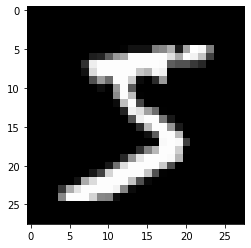

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

In [7]:
#PREPROCESS THE IMAGE

image_height, image_width=28,28


In [8]:
X_train=X_train.reshape(60000, image_height*image_width)
X_test=X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [11]:
X_train/=255.0
X_test/=255.0

In [12]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [14]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
#BUILDING THE MODEL

model=Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
#COMPILE THE MODEL

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
#TRAIN THE MODEL

history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1855 - accuracy: 0.9438 - val_loss: 0.1055 - val_accuracy: 0.9676
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0801 - accuracy: 0.9757 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.0784 - val_accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0839 - val_accuracy: 0.9777
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0725 - val_accuracy: 0.9797
Epoch 6/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0836 - val_accuracy: 0.9794
Epoch 7/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.1051 -

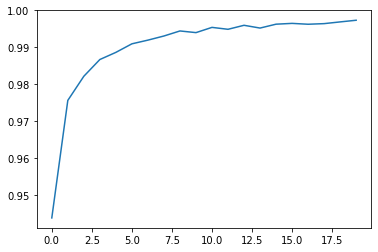

In [19]:
plt.plot(history.history['accuracy'])

In [20]:
#EVALUATING THE MODEL

score=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1388 - accuracy: 0.9812


In [21]:
##More operations such as the convolution operation, max pooling, flattening and dense layer.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [22]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [25]:
X_train/=255.0
X_test/=255.0

In [26]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [28]:
#MODEL DEVELOPMENT

cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [29]:
history_cnn=cnn.fit(X_train, y_train, epochs=12, verbose=1, validation_data=(X_train,y_train))

Epoch 1/12
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1497 - accuracy: 0.9546 - val_loss: 0.0545 - val_accuracy: 0.9834
Epoch 2/12
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 3/12
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 4/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0226 - val_accuracy: 0.9924
Epoch 5/12
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0145 - val_accuracy: 0.9952
Epoch 6/12
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0089 - val_accuracy: 0.9972
Epoch 7/12
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0099 -

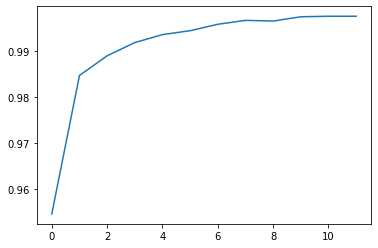

In [30]:
plt.plot(history_cnn.history['accuracy'])

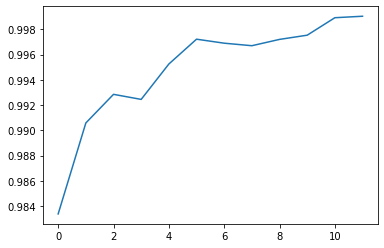

In [31]:
plt.plot(history_cnn.history['val_accuracy'])